In [1]:
'''Code to plot MgZnCa Temperature Properites from .txt directory
Code by Scott Gleason, University of New South Wales (UNSW), Australia 
S.Gleason@student.unsw.edu.au, June 2015'''

'Code to plot MgZnCa Temperature Properites from .txt directory\nCode by Scott Gleason, University of New South Wales (UNSW), Australia \nS.Gleason@student.unsw.edu.au, June 2015'

In [2]:
'''Imports numpy, matplotlib, and glob libaries 
numpy & matplotlib allow for complex math
glob allows for pattern matching with * and ? wild cards
    (note glob's only function is glob (i.e. glob.glob('search critrea')))'''

%matplotlib inline
'Generates plots inline of the notebook. Commit out if want indivudual files'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator #Used for minor axis ticks
import glob

In [3]:
cd 'C:\\Users\\z3492622\\Documents\\PhD Project\\Results'

C:\Users\z3492622\Documents\PhD Project\Results


In [4]:
cd 'Modelling\\'

C:\Users\z3492622\Documents\PhD Project\Results\Modelling


In [5]:
'Directs to directory containing files to be anaylised'

Folder = 'MgZnCa BMG Properites'

print 'Directory to be anaylised:'
print Folder

Directory to be anaylised:
MgZnCa BMG Properites


In [6]:
def dataFilesRange(FileType, StartFile = 0, EndFile = None):
    '''Preforms a glob list of *.filetype within directory
    FileType = csv, txt, etc
    StartFile = Number of first file to be anaylsis from the glob
        Defaulted to 0
    EndFile = Number of last file to be anaylsis from the glob
        Defaulted to None, as to return last value'''
    
    'assertion test for the function'
    assert StartFile > -1, 'First file must be atleast 0'
    if EndFile<>None:
        assert EndFile > 0, 'Last file must be atleast 1'

    dataFiles = glob.glob(Folder + '\\*.'+ FileType)

    'set range of files to be analysed'
    Range = dataFiles[StartFile:EndFile]

    return Range

In [7]:
def dataArray(filename, Delimiter = ',', StartRow = 1, LastColumn = None):
    '''Creates an array from an input file, and defines limits of the array
    filename = file to anaylisied
    Delimiter = data separator (defaulted to ',' for .csv)
    StartRow = row data starts on (defaulted to 1)
    LastColumn = column data ends on (defaulted to None)
    Note: .txt use 'None' as Delimiter'''
    
    assert StartRow > 0, 'First row must be atleast 1'
    
    '''If condition determining the last column of the array
    also contains assertion to ensure last column is valid'''
    if LastColumn<>None:
        assert LastColumn > 0, 'Last column must be atleast 1'
        Column = range(0, LastColumn, 1)
    else:
        Column = None

    'Returns array of data, do not edit this string'
    return np.loadtxt(filename, delimiter = Delimiter,
                      skiprows = StartRow - 1, 
                      usecols = Column)

In [8]:
def plotFile(filename, xAxis=1, yAxis=2):
    '''Generates a plot of data from a file, and formates chart layout
    filename = file to anaylisied
    xAxis = Column of X-Axis Data (defaulted to 1st column)
    yAxis = Column of Y-Axis Data (defaulted to 2nd column)'''
    
    'Assertion to ensure x and y axis are valid'
    assert xAxis > 0, 'X Axis must be at least 1'
    assert yAxis > 0, 'Y Axis must be at least 1'
    
    'Defines the columns X & Y axis data come from in filename array'
    xAxisData = filename[:, xAxis-1]
    yAxisData = filename[:, yAxis-1]

    'Define Plot layout, axis lables, legends, etc'
    PlotLayout = {'fileName': 'MgZnCa Temps', # Plot filename 
                  'title': '', # Title lable
                  'titleFontSize': 20, # Title lable font size
                  'X-Lable': '$X$', # X axis lable
                  'Y-Lable': '$^{\circ}C$', # Y axis lable
                  'axisFontSize': 16, # X & Y axis lable font size
                  'xAxisMax': 20, # upper scale limit for X axis
                  'yAxisMax': 500, # upper scale limit for y axis
                  'lineColourType': 'k', # line colour and style
                  'lineWeight': 1 # weight of line
                  }
    
    'Add PlotLayout objects to plot'
    plt.figure(PlotLayout['fileName'])
    plt.title(PlotLayout['title'], fontsize = PlotLayout['titleFontSize'])
    plt.xlabel(PlotLayout['X-Lable'], fontsize = PlotLayout['axisFontSize'])
    plt.ylabel(PlotLayout['Y-Lable'], fontsize = PlotLayout['axisFontSize'])
    
    'Turns on minor axis ticks'
    plt.minorticks_on()
    
    'Generates the plot'
    plt.plot(xAxisData, yAxisData,
             PlotLayout['lineColourType'], 
             linewidth = PlotLayout['lineWeight'])
    plt.axis([0, PlotLayout['xAxisMax'], 0, PlotLayout['yAxisMax']])
    plt.show()

In [9]:
filesToPlot = dataFilesRange('txt', 0, None)
print filesToPlot

['MgZnCa BMG Properites\\Mg70-XZn24+XCa6.txt', 'MgZnCa BMG Properites\\Mg72-XZn24+XCa4.txt', 'MgZnCa BMG Properites\\Mg75-XZn20+XCa5.txt']


In [10]:
def PlotFilesLoop():
    '''For loop to print dataFileRange
    Prints filepath of each *.filetype file anaylisied 
    Uses dataArray() function to print matrix of each file
    Uses dataArray() and plotFile() functions to plot each file'''
    
    for files in filesToPlot:
        print files #Prints files

        '''dataArray takes 4 arrguments; filename, Delimiter, StartRow, and LastColumn
        Note1: For .csv Delimiter = ',' and for .txt Delimiter = None'''
        dataToPlot = dataArray(files, None, 2, None) #Defines data and limits
        print dataToPlot #Prints matrix
        'plotfile requires the X & Y axis be specified'
        plotFile(dataToPlot, 1, 2) #Generates plot

MgZnCa BMG Properites\Mg70-XZn24+XCa6.txt
[[   0.     120.     141.     352.     442.      21.       0.629    0.55
     3.   ]
 [   2.     128.     151.     336.     406.      23.       0.658    0.591
     3.3  ]
 [   4.     129.     155.     334.     410.      26.       0.662    0.589
     2.8  ]
 [   6.     131.     160.     335.     412.      29.       0.664    0.59
     2.7  ]
 [   8.     138.     169.     338.     424.      31.       0.673    0.59
     1.5  ]]


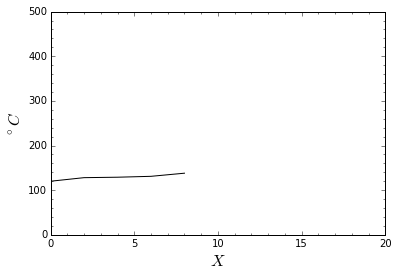

MgZnCa BMG Properites\Mg72-XZn24+XCa4.txt
[[   0.      84.     115.     335.     420.      31.       0.587    0.515
     1.1  ]
 [   2.      86.     126.     335.     398.      40.       0.59     0.535
     2.8  ]
 [   3.     111.     139.     339.     378.      28.       0.627    0.59
     0.   ]
 [   4.      84.     135.     331.     393.      51.       0.591    0.536
     4.   ]
 [   6.      89.     140.     336.     391.      51.       0.594    0.545
     3.5  ]
 [   8.      89.     142.     335.     436.      53.       0.595    0.511
     0.7  ]]


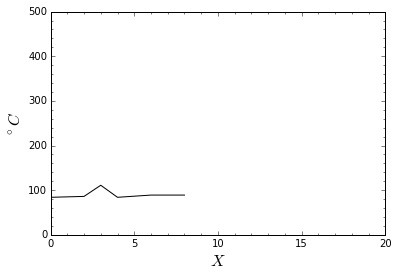

MgZnCa BMG Properites\Mg75-XZn20+XCa5.txt
[[   0.     114.     122.     353.     452.5      8.       0.618    0.533
     1.   ]
 [   5.     124.     136.     351.     398.      12.       0.636    0.592
     3.   ]
 [   7.5    134.     146.     336.     375.      12.       0.668    0.628
     4.   ]
 [   8.     134.5    145.5    333.     374.5     11.       0.672    0.629
     4.   ]
 [  10.     141.5    155.     336.     387.      13.5      0.681    0.628
     3.   ]
 [  15.     169.     174.     336.     432.5      5.       0.726    0.627
     2.   ]]


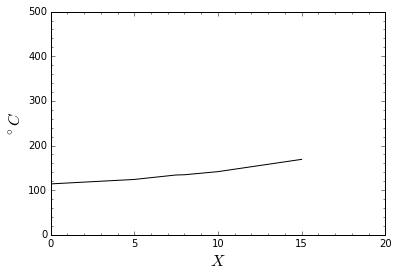

In [11]:
PlotFilesLoop()